# Telecom Churn Case Study
# Group:- Madhusmita Ghosh and Pranav Pandey

### Problem statement:-
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Steps:-
1. Reading, understanding the data
2. Preparing the data for modelling and EDA
3. Building the model
4. Evaluate the model

#### Importing Important Libraries

In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import IncrementalPCA

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# Extra
import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None) #to display all columns
pd.set_option('display.max_rows',None) #to display all rows

from imblearn.over_sampling import SMOTE


#### 1. Reading and Understanding data

In [118]:
df=pd.read_csv('train.csv')
unseen=pd.read_csv('test.csv')

In [119]:
df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [120]:
df.shape

(69999, 172)

In [121]:
df=df.set_index('id')

#### 2.Preparing Data for Modelling and EDA

####  Missing Values Checking and deleting

In [122]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

null
count_rech_2g_6           74.90
arpu_2g_6                 74.90
night_pck_user_6          74.90
date_of_last_rech_data_6  74.90
total_rech_data_6         74.90
av_rech_amt_data_6        74.90
max_rech_data_6           74.90
count_rech_3g_6           74.90
arpu_3g_6                 74.90
fb_user_6                 74.90
arpu_3g_7                 74.48
night_pck_user_7          74.48
date_of_last_rech_data_7  74.48
total_rech_data_7         74.48
max_rech_data_7           74.48
fb_user_7                 74.48
av_rech_amt_data_7        74.48
count_rech_2g_7           74.48
count_rech_3g_7           74.48
arpu_2g_7                 74.48
arpu_2g_8                 73.69
night_pck_user_8          73.69
arpu_3g_8                 73.69
max_rech_data_8           73.69
av_rech_amt_data_8        73.69
date_of_last_rech_data_8  73.69
fb_user_8                 73.69
count_rech_3g_8           73.69
total_rech_data_8         73.69
count_rech_2g_8           73.69
isd_og_mou_8               5.29
std_og_t2c_mou_8           5.29
std_ic_t2f_mou_8           5.29
std_ic_t2o_mou_8           5.29
std_og_mou_8               5.29
std_ic_t2m_mou_8           5.29
loc_ic_t2f_mou_8           5.29
std_ic_t2t_mou_8           5.29
spl_og_mou_8               5.29
loc_ic_mou_8               5.29
og_others_8                5.29
std_ic_mou_8               5.29
std_og_t2f_mou_8           5.29
loc_og_t2c_mou_8           5.29
ic_others_8                5.29
std_og_t2m_mou_8           5.29
onnet_mou_8                5.29
offnet_mou_8               5.29
roam_ic_mou_8              5.29
roam_og_mou_8              5.29
loc_og_t2t_mou_8           5.29
loc_og_t2m_mou_8           5.29
loc_og_t2f_mou_8           5.29
loc_ic_t2m_mou_8           5.29
loc_ic_t2t_mou_8           5.29
loc_og_mou_8               5.29
isd_ic_mou_8               5.29
std_og_t2t_mou_8           5.29
spl_ic_mou_8               5.29
std_ic_t2t_mou_6           3.95
std_ic_t2m_mou_6           3.95
ic_others_6                3.95
loc_ic_mou_6               3.95
std_ic_t2f_mou_6           3.95
isd_ic_mou_6               3.95
std_ic_mou_6               3.95
spl_ic_mou_6               3.95
std_ic_t2o_mou_6           3.95
loc_ic_t2f_mou_6           3.95
isd_og_mou_6               3.95
std_og_t2m_mou_6           3.95
std_og_t2f_mou_6           3.95
loc_ic_t2m_mou_6           3.95
loc_og_mou_6               3.95
loc_og_t2c_mou_6           3.95
std_og_t2c_mou_6           3.95
loc_og_t2f_mou_6           3.95
loc_og_t2m_mou_6           3.95
std_og_mou_6               3.95
loc_og_t2t_mou_6           3.95
std_og_t2t_mou_6           3.95
offnet_mou_6               3.95
onnet_mou_6                3.95
spl_og_mou_6               3.95
roam_ic_mou_6              3.95
og_others_6                3.95
roam_og_mou_6              3.95
loc_ic_t2t_mou_6           3.95
roam_og_mou_7              3.84
ic_others_7                3.84
loc_og_mou_7               3.84
onnet_mou_7                3.84
offnet_mou_7               3.84
loc_og_t2c_mou_7           3.84
loc_og_t2f_mou_7           3.84
loc_og_t2m_mou_7           3.84
roam_ic_mou_7              3.84
std_og_t2t_mou_7           3.84
loc_og_t2t_mou_7           3.84
loc_ic_t2m_mou_7           3.84
isd_ic_mou_7               3.84
std_og_t2f_mou_7           3.84
loc_ic_t2t_mou_7           3.84
loc_ic_t2f_mou_7           3.84
og_others_7                3.84
loc_ic_mou_7               3.84
spl_og_mou_7               3.84
std_ic_t2t_mou_7           3.84
isd_og_mou_7               3.84
std_ic_t2m_mou_7           3.84
std_og_mou_7               3.84
std_ic_t2f_mou_7           3.84
std_og_t2m_mou_7           3.84
std_og_t2c_mou_7           3.84
std_ic_mou_7               3.84
std_ic_t2o_mou_7           3.84
spl_ic_mou_7               3.84
date_of_last_rech_8        3.52
date_of_last_rech_7        1.76
date_of_last_rech_6        1.57
last_date_of_month_8       1.05
loc_og_t2o_mou             1.00
std_og_t2o_mou             1.00
loc_ic_t2o_mou             1.00
last_date_of_month_7       

In [123]:
# List the columns having more than 40% missing values
col_list_missing_40 = list(df_missing_columns.index[df_missing_columns['null'] > 40])

In [124]:
# Delete the columns having more than 40% missing values
df.drop(col_list_missing_40, axis=1, inplace=True)

In [125]:
df.shape

(69999, 141)

In [126]:
df.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
id                                                              
0         109             0.0             0.0             0.0   
1         109             0.0             0.0             0.0   
2         109             0.0             0.0             0.0   
3         109             0.0             0.0             0.0   
4         109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
id                                                                           
0             6/30/2014            7/31/2014            8/31/2014   31.277   
1             6/30/2014            7/31/2014            8/31/2014    0.000   
2             6/30/2014            7/31/2014            8/31/2014   60.806   
3             6/30/2014            7/31/2014            8/31/2014  156.362   
4             6/30/2014            7/31/2014            8/31/2014  240.708   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
id                                                                          
0    87.009    7.527        48.58       124.38         1.29         32.24   
1   122.787   42.953         0.00         0.00         0.00          0.00   
2   103.176    0.000         0.53        15.93         0.00         53.99   
3   205.260  111.095         7.26        16.01         0.00         68.76   
4   128.191  101.565        21.28         4.83         6.13         56.99   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
id                                                                            
0          96.68          2.33           0.00            0.0            0.0   
1          25.99         30.89           0.00            0.0            0.0   
2          82.05          0.00           0.00            0.0            0.0   
3          78.48         50.23           0.00            0.0            0.0   
4          38.11          9.63          53.64            0.0            0.0   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
id                                                                  
0            0.00            0.0           0.00              2.23   
1            0.00            0.0           0.00              0.00   
2            0.00            0.0           0.00              0.53   
3            0.00            0.0           1.63              6.99   
4           15.73            0.0           0.00             10.16   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
id                                                                           
0               0.00              0.28              5.29             16.04   
1               0.00              0.00              0.00              0.00   
2              12.98              0.00             24.11              0.00   
3               3.94              0.00             37.91             44.89   
4               4.83              6.13             36.74             19.88   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
id                                                                           
0               2.33              0.00              0.00              0.00   
1               0.00              0.00              0.00              0.00   
2               0.00              0.00              0.00              0.00   
3              23.63              0.00              0.00              0.00   
4               4.61             11.99              1.23              5.01   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
id                                                                       
0               0.00              0.00              0.00          7.53   
1               0.00             22.01             29.79          0.00   
2               2.14             

##### Deleting the date columns as the date columns which are not required in our analysis

In [127]:
df.columns

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7', 'arpu_8',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'churn_probability'],
      dtype='object', length=141)

In [128]:
# List the date columns
date_cols = [dt for dt in df.columns.to_list() if 'date' in dt]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [129]:
df.drop(df[date_cols], axis=1, inplace=True)

In [130]:
df.shape

(69999, 135)

#### check unique value and duplicate records and null records

In [131]:
dup_Row=len(df[df.duplicated()])
print("Total Duplicated Rows Are",round(dup_Row,1))

Total Duplicated Rows Are 0


In [132]:
null_unique = pd.DataFrame()
null_unique['nulls'] = pd.Series(df.isnull().sum())
null_unique['unique'] = pd.Series(df.nunique())
null_unique

nulls  unique
circle_id               0       1
loc_og_t2o_mou        702       1
std_og_t2o_mou        702       1
loc_ic_t2o_mou        702       1
arpu_6                  0   61615
arpu_7                  0   61425
arpu_8                  0   60194
onnet_mou_6          2768   20057
onnet_mou_7          2687   20076
onnet_mou_8          3703   19725
offnet_mou_6         2768   26254
offnet_mou_7         2687   26139
offnet_mou_8         3703   25995
roam_ic_mou_6        2768    5306
roam_ic_mou_7        2687    4240
roam_ic_mou_8        3703    4252
roam_og_mou_6        2768    6568
roam_og_mou_7        2687    5305
roam_og_mou_8        3703    5215
loc_og_t2t_mou_6     2768   11491
loc_og_t2t_mou_7     2687   11359
loc_og_t2t_mou_8     3703   11296
loc_og_t2m_mou_6     2768   17848
loc_og_t2m_mou_7     2687   17641
loc_og_t2m_mou_8     3703   17616
loc_og_t2f_mou_6     2768    3376
loc_og_t2f_mou_7     2687    3365
loc_og_t2f_mou_8     3703    3311
loc_og_t2c_mou_6     2768    1945
loc_og_t2c_mou_7     2687    2103
loc_og_t2c_mou_8     3703    2204
loc_og_mou_6         2768   22309
loc_og_mou_7         2687   22012
loc_og_mou_8         3703   21950
std_og_t2t_mou_6     2768   14554
std_og_t2t_mou_7     2687   14745
std_og_t2t_mou_8     3703   14483
std_og_t2m_mou_6     2768   16059
std_og_t2m_mou_7     2687   16234
std_og_t2m_mou_8     3703   15968
std_og_t2f_mou_6     2768    2074
std_og_t2f_mou_7     2687    1991
std_og_t2f_mou_8     3703    1945
std_og_t2c_mou_6     2768       1
std_og_t2c_mou_7     2687       1
std_og_t2c_mou_8     3703       1
std_og_mou_6         2768   21837
std_og_mou_7         2687   22088
std_og_mou_8         3703   21745
isd_og_mou_6         2768    1103
isd_og_mou_7         2687    1084
isd_og_mou_8         3703    1008
spl_og_mou_6         2768    3503
spl_og_mou_7         2687    3827
spl_og_mou_8         3703    3848
og_others_6          2768     914
og_others_7          2687     148
og_others_8          3703     179
total_og_mou_6          0   33135
total_og_mou_7          0   33195
total_og_mou_8          0   32897
loc_ic_t2t_mou_6     2768   11637
loc_ic_t2t_mou_7     2687   11595
loc_ic_t2t_mou_8     3703   11446
loc_ic_t2m_mou_6     2768   19034
loc_ic_t2m_mou_7     2687   18945
loc_ic_t2m_mou_8     3703   19022
loc_ic_t2f_mou_6     2768    6200
loc_ic_t2f_mou_7     2687    6287
loc_ic_t2f_mou_8     3703    6092
loc_ic_mou_6         2768   24442
loc_ic_mou_7         2687   24258
loc_ic_mou_8         3703   24182
std_ic_t2t_mou_6     2768    5323
std_ic_t2t_mou_7     2687    5479
std_ic_t2t_mou_8     3703    5367
std_ic_t2m_mou_6     2768    7931
std_ic_t2m_mou_7     2687    8033
std_ic_t2m_mou_8     3703    7906
std_ic_t2f_mou_6     2768    2624
std_ic_t2f_mou_7     2687    2695
std_ic_t2f_mou_8     3703    2583
std_ic_t2o_mou_6     2768       1
std_ic_t2o_mou_7     2687       1
std_ic_t2o_mou_8     3703       1
std_ic_mou_6         2768    9876
std_ic_mou_7         2687   10112
std_ic_mou_8         3703    9939
total_ic_mou_6          0   27432
total_ic_mou_7          0   27418
total_ic_mou_8          0   27318
spl_ic_mou_6         2768      78
spl_ic_mou_7         2687     103
spl_ic_mou_8         3703      95
isd_ic_mou_6         2768    4421
isd_ic_mou_7         2687    4640
isd_ic_mou_8         3703    4694
ic_others_6          2768    1523
ic_others_7          2687    1658
ic_others_8          3703    1565
total_rech_num_6        0      94
total_rech_num_7        0      96
total_rech_num_8        0      92
total_rech_amt_6        0    2108
total_rech_amt_7        0    2147
total_rech_amt_8        0    2149
max_rech_amt_6          0     190
max_rech_amt_7          0     178
max_rech_amt_8          0     202
last_day_rch_amt_6      0     179
last_day_rch_amt_7      0     166
last_day_rch_amt_8      0     191
vol_2g_mb_6             0   11494
vol_2g_mb_7             0   11443
vol_2g_mb_8             0   11359
vol_3g_mb_6             0    9768
vol_3g_mb_7             0   10296
vol_3g_m

In [133]:
#circle_id has 1 value so can be deleted, and columns which has only values as 0 and null can be delete
unique_cols=['circle_id','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_og_t2c_mou_8','std_og_t2c_mou_7',
'std_og_t2c_mou_6','loc_ic_t2o_mou','std_og_t2o_mou','loc_og_t2o_mou']

In [134]:
df.drop(df[unique_cols], axis=1,inplace=True)

In [135]:
df.shape

(69999, 125)

In [136]:
df.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
id                                                                     
0    31.277   87.009    7.527        48.58       124.38         1.29   
1     0.000  122.787   42.953         0.00         0.00         0.00   
2    60.806  103.176    0.000         0.53        15.93         0.00   
3   156.362  205.260  111.095         7.26        16.01         0.00   
4   240.708  128.191  101.565        21.28         4.83         6.13   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
id                                                                           
0          32.24         96.68          2.33           0.00            0.0   
1           0.00         25.99         30.89           0.00            0.0   
2          53.99         82.05          0.00           0.00            0.0   
3          68.76         78.48         50.23           0.00            0.0   
4          56.99         38.11          9.63          53.64            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
id                                                               
0             0.0           0.00            0.0           0.00   
1             0.0           0.00            0.0           0.00   
2             0.0           0.00            0.0           0.00   
3             0.0           0.00            0.0           1.63   
4             0.0          15.73            0.0           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
id                                                                           
0               2.23              0.00              0.28              5.29   
1               0.00              0.00              0.00              0.00   
2               0.53             12.98              0.00             24.11   
3               6.99              3.94              0.00             37.91   
4              10.16              4.83              6.13             36.74   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
id                                                                           
0              16.04              2.33              0.00              0.00   
1               0.00              0.00              0.00              0.00   
2               0.00              0.00              0.00              0.00   
3              44.89             23.63              0.00              0.00   
4              19.88              4.61             11.99              1.23   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
id                                                                           
0               0.00              0.00              0.00              0.00   
1               0.00              0.00             22.01             29.79   
2               0.00              2.14              0.00              0.00   
3               0.00              0.00              0.00              8.03   
4               5.01              0.00              9.85              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
id                                                               
0           7.53         16.04          2.61             46.34   
1           0.00          0.00          0.00              0.00   
2          24.64         12.98          0.00              0.00   
3          44.91         48.84         23.63              0.26   
4          58.91         25.94         15.76              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
id                                                                           
0             124.38              1.01             18.75             80.61   
1               0.00              0.00              0.00              0.00   
2               2.94              0.00             28.94             82.05

#### Filtering high value customers

In [137]:
df['avg_rech_amt_6_7_8'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'] +df['total_rech_amt_8'])/3

In [138]:
df.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
id                                                                     
0    31.277   87.009    7.527        48.58       124.38         1.29   
1     0.000  122.787   42.953         0.00         0.00         0.00   
2    60.806  103.176    0.000         0.53        15.93         0.00   
3   156.362  205.260  111.095         7.26        16.01         0.00   
4   240.708  128.191  101.565        21.28         4.83         6.13   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
id                                                                           
0          32.24         96.68          2.33           0.00            0.0   
1           0.00         25.99         30.89           0.00            0.0   
2          53.99         82.05          0.00           0.00            0.0   
3          68.76         78.48         50.23           0.00            0.0   
4          56.99         38.11          9.63          53.64            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
id                                                               
0             0.0           0.00            0.0           0.00   
1             0.0           0.00            0.0           0.00   
2             0.0           0.00            0.0           0.00   
3             0.0           0.00            0.0           1.63   
4             0.0          15.73            0.0           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
id                                                                           
0               2.23              0.00              0.28              5.29   
1               0.00              0.00              0.00              0.00   
2               0.53             12.98              0.00             24.11   
3               6.99              3.94              0.00             37.91   
4              10.16              4.83              6.13             36.74   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
id                                                                           
0              16.04              2.33              0.00              0.00   
1               0.00              0.00              0.00              0.00   
2               0.00              0.00              0.00              0.00   
3              44.89             23.63              0.00              0.00   
4              19.88              4.61             11.99              1.23   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
id                                                                           
0               0.00              0.00              0.00              0.00   
1               0.00              0.00             22.01             29.79   
2               0.00              2.14              0.00              0.00   
3               0.00              0.00              0.00              8.03   
4               5.01              0.00              9.85              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
id                                                               
0           7.53         16.04          2.61             46.34   
1           0.00          0.00          0.00              0.00   
2          24.64         12.98          0.00              0.00   
3          44.91         48.84         23.63              0.26   
4          58.91         25.94         15.76              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
id                                                                           
0             124.38              1.01             18.75             80.61   
1               0.00              0.00              0.00              0.00   
2               2.94              0.00             28.94             82.05

In [139]:
avj_70 = df['avg_rech_amt_6_7_8'].quantile(0.7)
avj_70

365.6666666666667

In [140]:
df_HVC = df[df['avg_rech_amt_6_7_8'] >=avj_70 ]
df_HVC.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
id                                                                      
12   439.919  397.946  392.024       244.46       108.31        42.98   
15   580.549  377.294  338.286        10.43        24.99       194.43   
23  1130.948  905.506  479.762       859.53       372.71         0.89   
24   371.974  352.069  240.449        93.18        38.29        29.86   
25   362.951  321.763  689.603       193.71       124.53       197.54   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
id                                                                           
12        571.98        727.91        644.43            0.0            0.0   
15        317.11        341.79        197.09            0.0            0.0   
23        293.46        450.11        386.91            0.0            0.0   
24        531.19        507.76        222.03            0.0            0.0   
25        423.21        184.88        556.61            0.0            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
id                                                               
12            0.0            0.0            0.0            0.0   
15            0.0            0.0            0.0            0.0   
23            0.0            0.0            0.0            0.0   
24            0.0            0.0            0.0            0.0   
25            0.0            0.0            0.0            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
id                                                                           
12              0.00              7.86              3.98             44.01   
15             10.43             24.99            194.43            313.76   
23            859.53            372.71              0.89             79.79   
24             93.18             38.29             29.86            159.29   
25             49.81             75.01             81.86            164.39   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
id                                                                           
12             13.93             51.24              0.00              0.00   
15            330.88            185.88              3.26             10.91   
23            424.63            378.01             11.58             25.43   
24            219.44             99.86              0.00              0.00   
25            115.48            229.68              3.31              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
id                                                                           
12              0.00               0.0               0.0              0.00   
15              4.94               0.0               0.0              0.00   
23              8.88               0.0               0.0              0.00   
24              0.00               0.0               0.0              0.36   
25              0.36               0.0               0.0              7.01   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
id                                                               
12         44.01         21.79         55.23            244.46   
15        327.46        366.79        385.26              0.00   
23        950.91        822.78        387.79              0.00   
24        252.48        257.74        129.73              0.00   
25        217.53        190.49        311.91            143.89   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
id                                                                           
12            100.44             38.99            527.96            713.98   
15              0.00              0.00              0.00              0.00   
23              0.00              0.00            202.08            

In [141]:
df_HVC.shape

(21003, 126)

In [142]:
df_HVC['churn_probability'].value_counts()

0    19685
1     1318
Name: churn_probability, dtype: int64

In [143]:
df_HVC.drop(df_HVC[['avg_rech_amt_6_7_8']],axis=1,inplace=True)

In [144]:
df_HVC.shape

(21003, 125)

#### clecking for null values for High value customers

In [145]:
# Cheking percent of missing values in columns
df_HCV_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_HCV_missing_columns

null
loc_og_t2m_mou_8    5.29
loc_og_mou_8        5.29
loc_ic_t2m_mou_8    5.29
loc_og_t2c_mou_8    5.29
loc_ic_t2f_mou_8    5.29
loc_og_t2f_mou_8    5.29
loc_ic_mou_8        5.29
std_og_t2t_mou_8    5.29
std_og_mou_8        5.29
std_ic_t2t_mou_8    5.29
og_others_8         5.29
loc_og_t2t_mou_8    5.29
std_ic_t2m_mou_8    5.29
roam_og_mou_8       5.29
std_ic_t2f_mou_8    5.29
std_og_t2m_mou_8    5.29
roam_ic_mou_8       5.29
std_ic_mou_8        5.29
spl_og_mou_8        5.29
offnet_mou_8        5.29
spl_ic_mou_8        5.29
isd_og_mou_8        5.29
onnet_mou_8         5.29
isd_ic_mou_8        5.29
std_og_t2f_mou_8    5.29
ic_others_8         5.29
loc_ic_t2t_mou_8    5.29
og_others_6         3.95
loc_ic_t2t_mou_6    3.95
loc_ic_mou_6        3.95
loc_ic_t2m_mou_6    3.95
loc_ic_t2f_mou_6    3.95
std_ic_t2t_mou_6    3.95
std_ic_t2m_mou_6    3.95
std_ic_t2f_mou_6    3.95
std_ic_mou_6        3.95
spl_ic_mou_6        3.95
isd_ic_mou_6        3.95
ic_others_6         3.95
isd_og_mou_6        3.95
spl_og_mou_6        3.95
loc_og_t2f_mou_6    3.95
std_og_t2m_mou_6    3.95
loc_og_t2m_mou_6    3.95
loc_og_t2c_mou_6    3.95
loc_og_t2t_mou_6    3.95
loc_og_mou_6        3.95
std_og_t2t_mou_6    3.95
roam_og_mou_6       3.95
roam_ic_mou_6       3.95
std_og_mou_6        3.95
offnet_mou_6        3.95
std_og_t2f_mou_6    3.95
onnet_mou_6         3.95
spl_ic_mou_7        3.84
offnet_mou_7        3.84
roam_ic_mou_7       3.84
std_ic_t2t_mou_7    3.84
roam_og_mou_7       3.84
std_ic_t2f_mou_7    3.84
isd_ic_mou_7        3.84
onnet_mou_7         3.84
loc_og_t2t_mou_7    3.84
std_ic_t2m_mou_7    3.84
ic_others_7         3.84
loc_og_t2m_mou_7    3.84
std_ic_mou_7        3.84
std_og_mou_7        3.84
loc_og_t2f_mou_7    3.84
og_others_7         3.84
loc_ic_t2f_mou_7    3.84
loc_og_t2c_mou_7    3.84
loc_ic_t2m_mou_7    3.84
loc_og_mou_7        3.84
loc_ic_t2t_mou_7    3.84
std_og_t2t_mou_7    3.84
isd_og_mou_7        3.84
std_og_t2f_mou_7    3.84
loc_ic_mou_7        3.84
spl_og_mou_7        3.84
std_og_t2m_mou_7    3.84
vol_3g_mb_6         0.00
monthly_3g_6        0.00
sachet_2g_6         0.00
vol_3g_mb_7         0.00
vol_3g_mb_8         0.00
sachet_2g_7         0.00
monthly_2g_8        0.00
monthly_2g_6        0.00
monthly_2g_7        0.00
sachet_2g_8         0.00
jun_vbc_3g          0.00
monthly_3g_7        0.00
monthly_3g_8        0.00
sachet_3g_6         0.00
sachet_3g_7         0.00
sachet_3g_8         0.00
aon                 0.00
aug_vbc_3g          0.00
jul_vbc_3g          0.00
vol_2g_mb_7         0.00
churn_probability   0.00
vol_2g_mb_8         0.00
arpu_6              0.00
vol_2g_mb_6         0.00
last_day_rch_amt_8  0.00
arpu_8              0.00
total_og_mou_6      0.00
total_og_mou_7      0.00
total_og_mou_8      0.00
arpu_7              0.00
total_ic_mou_6      0.00
total_ic_mou_7      0.00
total_ic_mou_8      0.00
total_rech_num_6    0.00
total_rech_num_7    0.00
total_rech_num_8    0.00
total_rech_amt_6    0.00
total_rech_amt_7    0.00
total_rech_amt_8    0.00
max_rech_amt_6      0.00
max_rech_amt_7      0.00
max_rech_amt_8      0.00
last_day_rch_amt_6  0.00
last_day_rch_amt_7  0.00
avg_rech_amt_6_7_8  0.00

#### Handling rows with more than 50% null values

In [146]:
# Count the rows having more than 50% missing values
df_missing_rows_50 = df_HVC[(df_HVC.isnull().sum(axis=1)) > (len(df.columns)//2)]
df_missing_rows_50.shape

(60, 125)

In [147]:
# Deleting the rows having more than 50% missing values
df_HVC = df_HVC.drop(df_missing_rows_50.index)
df_HVC.shape

(20943, 125)

In [148]:
missing_data_percent = df_HVC.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

#### Imputing Missing Value

In [149]:
imp = SimpleImputer(strategy='constant', fill_value=0)
df_HVC[impute_cols] = imp.fit_transform(df_HVC[impute_cols])

In [150]:
df_HVC.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
id                                                                      
12   439.919  397.946  392.024       244.46       108.31        42.98   
15   580.549  377.294  338.286        10.43        24.99       194.43   
23  1130.948  905.506  479.762       859.53       372.71         0.89   
24   371.974  352.069  240.449        93.18        38.29        29.86   
25   362.951  321.763  689.603       193.71       124.53       197.54   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
id                                                                           
12        571.98        727.91        644.43            0.0            0.0   
15        317.11        341.79        197.09            0.0            0.0   
23        293.46        450.11        386.91            0.0            0.0   
24        531.19        507.76        222.03            0.0            0.0   
25        423.21        184.88        556.61            0.0            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
id                                                               
12            0.0            0.0            0.0            0.0   
15            0.0            0.0            0.0            0.0   
23            0.0            0.0            0.0            0.0   
24            0.0            0.0            0.0            0.0   
25            0.0            0.0            0.0            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
id                                                                           
12              0.00              7.86              3.98             44.01   
15             10.43             24.99            194.43            313.76   
23            859.53            372.71              0.89             79.79   
24             93.18             38.29             29.86            159.29   
25             49.81             75.01             81.86            164.39   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
id                                                                           
12             13.93             51.24              0.00              0.00   
15            330.88            185.88              3.26             10.91   
23            424.63            378.01             11.58             25.43   
24            219.44             99.86              0.00              0.00   
25            115.48            229.68              3.31              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
id                                                                           
12              0.00               0.0               0.0              0.00   
15              4.94               0.0               0.0              0.00   
23              8.88               0.0               0.0              0.00   
24              0.00               0.0               0.0              0.36   
25              0.36               0.0               0.0              7.01   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
id                                                               
12         44.01         21.79         55.23            244.46   
15        327.46        366.79        385.26              0.00   
23        950.91        822.78        387.79              0.00   
24        252.48        257.74        129.73              0.00   
25        217.53        190.49        311.91            143.89   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
id                                                                           
12            100.44             38.99            527.96            713.98   
15              0.00              0.00              0.00              0.00   
23              0.00              0.00            202.08            

In [151]:
df_HVC.shape

(20943, 125)

In [152]:
df_HVC.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20943 entries, 12 to 69996
Data columns (total 125 columns):
 #    Column              Dtype  
---   ------              -----  
 0    arpu_6              float64
 1    arpu_7              float64
 2    arpu_8              float64
 3    onnet_mou_6         float64
 4    onnet_mou_7         float64
 5    onnet_mou_8         float64
 6    offnet_mou_6        float64
 7    offnet_mou_7        float64
 8    offnet_mou_8        float64
 9    roam_ic_mou_6       float64
 10   roam_ic_mou_7       float64
 11   roam_ic_mou_8       float64
 12   roam_og_mou_6       float64
 13   roam_og_mou_7       float64
 14   roam_og_mou_8       float64
 15   loc_og_t2t_mou_6    float64
 16   loc_og_t2t_mou_7    float64
 17   loc_og_t2t_mou_8    float64
 18   loc_og_t2m_mou_6    float64
 19   loc_og_t2m_mou_7    float64
 20   loc_og_t2m_mou_8    float64
 21   loc_og_t2f_mou_6    float64
 22   loc_og_t2f_mou_7    float64
 23   loc_og_t2f_mou_8    float64
 24  

#### Exploratory Data Analysis

#### Univariate Analysis

In [153]:
df_HVC.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'churn_probability'],
      dtype='object', length=125)

<Axes: >

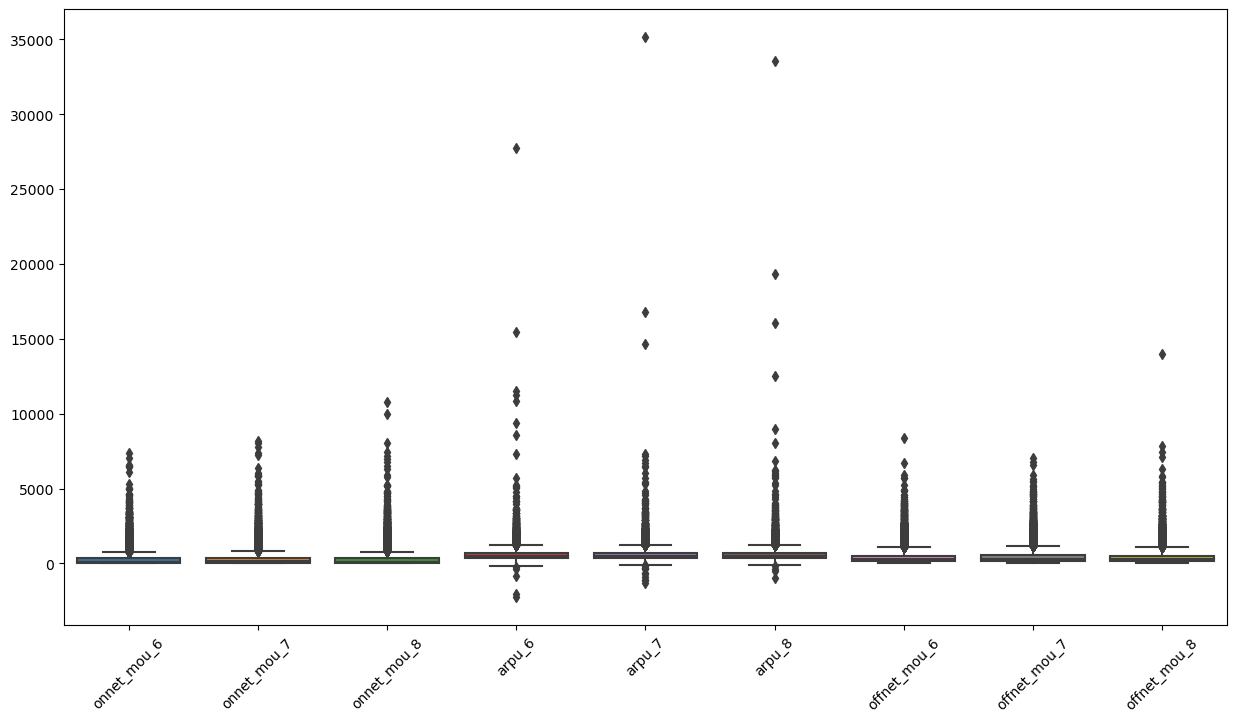

In [154]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data =df_HVC[['onnet_mou_6','onnet_mou_7','onnet_mou_8','arpu_6','arpu_7','arpu_8','offnet_mou_6','offnet_mou_7',
                          'offnet_mou_8']])


<Axes: xlabel='churn_probability', ylabel='count'>

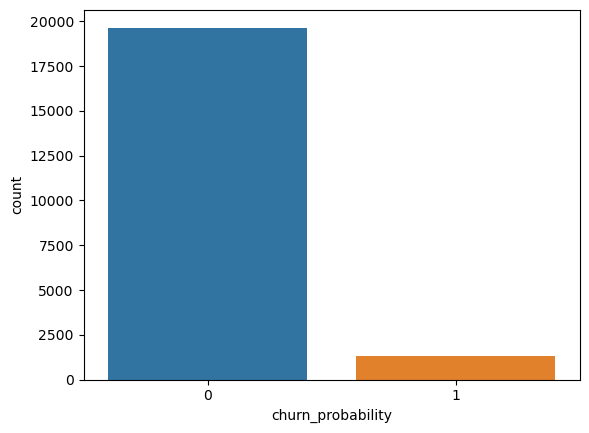

In [155]:
sns.countplot(x = 'churn_probability', data = df_HVC)

In [156]:
def univariate(var, stats=True):    
        sns.distplot(var)
        if stats == True:
            print(var.describe())

count    20943.000000
mean       568.113939
std        466.522771
min      -2258.709000
25%        339.567000
50%        480.583000
75%        696.743000
max      27731.088000
Name: arpu_6, dtype: float64


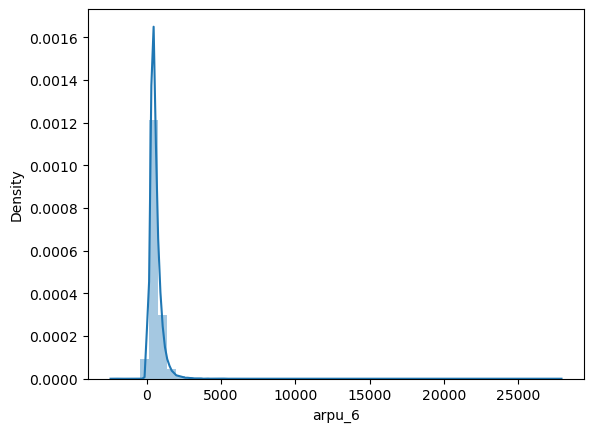

In [157]:
univariate(df_HVC.arpu_6)

count    20943.000000
mean       588.224174
std        479.191781
min      -1289.715000
25%        364.465000
50%        492.348000
75%        698.919500
max      35145.834000
Name: arpu_7, dtype: float64


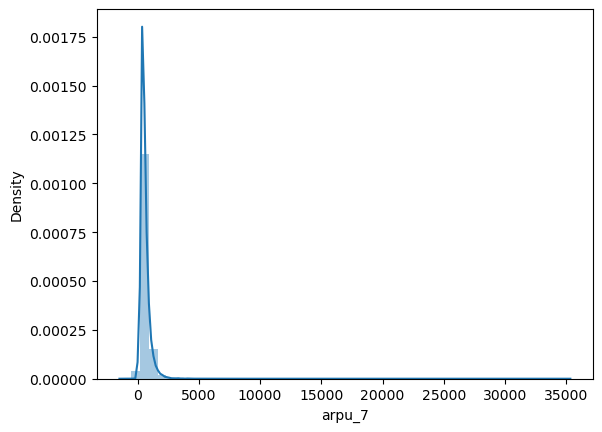

In [158]:
univariate(df_HVC.arpu_7)

count    20943.000000
mean       579.797598
std        500.076401
min       -945.808000
25%        353.040000
50%        490.490000
75%        695.404500
max      33543.624000
Name: arpu_8, dtype: float64


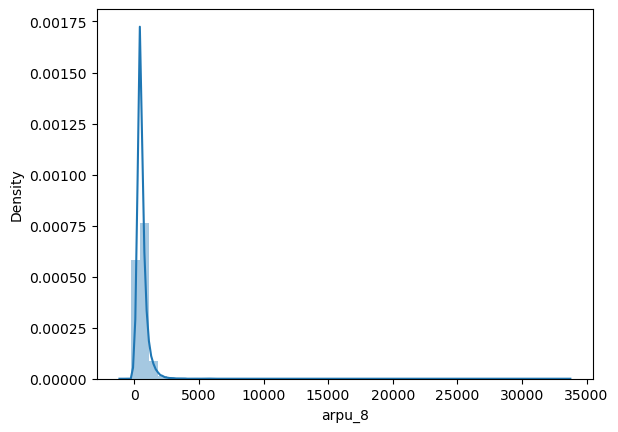

In [159]:
univariate(df_HVC.arpu_8)

#### Finding from Univeriate Analysis
- Churn probability is less for High Value Customers so data is imbalanced

### Bivariate Analysis

In [160]:
def bivariate_cols_vs_churn_prob(cont_col): #function for analysing loan status and continous columns.
        sns.boxplot(x=df['churn_probability'],y=df[cont_col])
        plt.show()

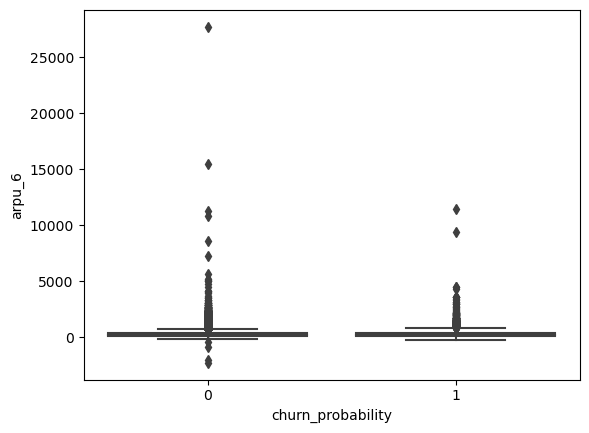

In [161]:
bivariate_cols_vs_churn_prob('arpu_6') # calling function for  bivariate analysis


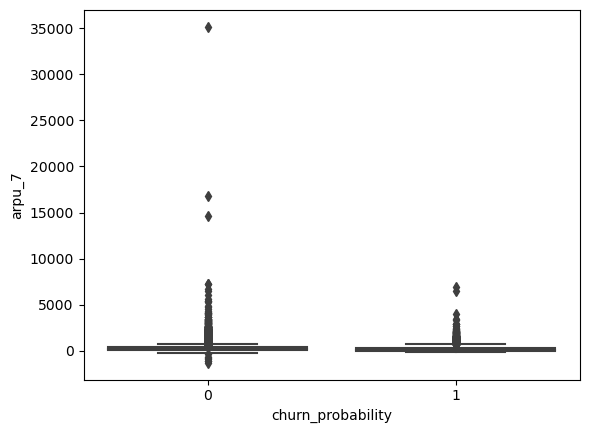

In [162]:
bivariate_cols_vs_churn_prob('arpu_7') # calling function for  bivariate analysis

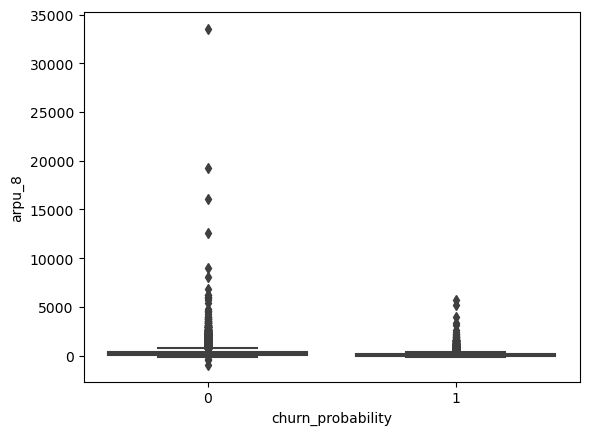

In [163]:
bivariate_cols_vs_churn_prob('arpu_8') # calling function for  bivariate analysis

#### heat map to check correlation among data

In [164]:
plt.figure(figsize=(100,100))
sns.heatmap(df_HVC.corr(),annot=True,fmt='.2f',cmap="YlOrBr")
plt.show()

#### Finding from heat map 
-data has correlation-

In [165]:
y=df_HVC.pop('churn_probability')
y.shape

(20943,)

In [166]:
X=df_HVC
X.shape

(20943, 124)

#### Performing PCA for feature reduction and decreasing correlation

#### Feature scaling


In [167]:
X.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
id                                                                      
12   439.919  397.946  392.024       244.46       108.31        42.98   
15   580.549  377.294  338.286        10.43        24.99       194.43   
23  1130.948  905.506  479.762       859.53       372.71         0.89   
24   371.974  352.069  240.449        93.18        38.29        29.86   
25   362.951  321.763  689.603       193.71       124.53       197.54   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
id                                                                           
12        571.98        727.91        644.43            0.0            0.0   
15        317.11        341.79        197.09            0.0            0.0   
23        293.46        450.11        386.91            0.0            0.0   
24        531.19        507.76        222.03            0.0            0.0   
25        423.21        184.88        556.61            0.0            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
id                                                               
12            0.0            0.0            0.0            0.0   
15            0.0            0.0            0.0            0.0   
23            0.0            0.0            0.0            0.0   
24            0.0            0.0            0.0            0.0   
25            0.0            0.0            0.0            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
id                                                                           
12              0.00              7.86              3.98             44.01   
15             10.43             24.99            194.43            313.76   
23            859.53            372.71              0.89             79.79   
24             93.18             38.29             29.86            159.29   
25             49.81             75.01             81.86            164.39   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
id                                                                           
12             13.93             51.24              0.00              0.00   
15            330.88            185.88              3.26             10.91   
23            424.63            378.01             11.58             25.43   
24            219.44             99.86              0.00              0.00   
25            115.48            229.68              3.31              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
id                                                                           
12              0.00               0.0               0.0              0.00   
15              4.94               0.0               0.0              0.00   
23              8.88               0.0               0.0              0.00   
24              0.00               0.0               0.0              0.36   
25              0.36               0.0               0.0              7.01   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
id                                                               
12         44.01         21.79         55.23            244.46   
15        327.46        366.79        385.26              0.00   
23        950.91        822.78        387.79              0.00   
24        252.48        257.74        129.73              0.00   
25        217.53        190.49        311.91            143.89   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
id                                                                           
12            100.44             38.99            527.96            713.98   
15              0.00              0.00              0.00              0.00   
23              0.00              0.00            202.08            

In [168]:
scale = StandardScaler()
df_HVC_SCALED = scale.fit_transform(X)

In [169]:
pca_again =IncrementalPCA(n_components=51)

In [170]:
df_HVC_PCA=pca_again.fit_transform(df_HVC_SCALED)

In [171]:
df_HVC_PCA.shape

(20943, 51)

In [172]:
X=df_HVC_PCA

#### Splitting data into Train and test

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14660, 51), (6283, 51), (14660,), (6283,))

#### Using Smote as data is imbalanced

In [174]:
sm = SMOTE(sampling_strategy='auto', random_state=50, k_neighbors=5, n_jobs=None)
X_train_sm_log, y_train_sm_log = sm.fit_resample(X_train, y_train)

In [175]:
X_train_sm_log.shape

(27550, 51)

####  Building Model with Logistic Regression

In [176]:
lr = LogisticRegression(max_iter=1000, tol=0.001)
pipe = Pipeline(steps = [('model',lr)])

In [177]:
pipe.fit(X_train_sm_log, y_train_sm_log)

Pipeline(steps=[('model', LogisticRegression(max_iter=1000, tol=0.001))])

In [178]:
train_score = pipe.score(X_train_sm_log, y_train_sm_log)
print("Training accuracy:", train_score)

Training accuracy: 0.8196733212341197


In [179]:
test_score = pipe.score(X_test, y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.8016870921534299


In [180]:
y_pred = lr.predict(X_test)

In [181]:
confusion_matrix(y_train, pipe.predict(X_train))

array([[11065,  2710],
       [  182,   703]], dtype=int64)

In [182]:
confusion_matrix(y_test, pipe.predict(X_test))

array([[4714, 1165],
       [  81,  323]], dtype=int64)

In [183]:
accuracy_score(y_test, y_pred)

0.8016870921534299

#### Accuracy score from Logistic Regression is .80169

In [184]:
recall_score(y_test, y_pred) #Recall Score

0.7995049504950495

#### Recall Score is 0.7995

In [185]:
precision_score(y_test, y_pred) #precision Score

0.21706989247311828

##### Our objective is capturing as many actual churners as possible, even at the cost of some false positives, so recall is more important. 



####  Preprocessing unseen data

In [186]:
unseen.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

In [187]:
unseen.drop(unseen[unique_cols], axis=1,inplace=True)

In [188]:
unseen.shape

(30000, 161)

In [189]:
unseen.drop(unseen[date_cols], axis=1, inplace=True)

In [190]:
unseen.shape

(30000, 155)

In [191]:
unseen.drop(col_list_missing_40, axis=1, inplace=True)

In [192]:
unseen.shape

(30000, 125)

In [193]:
unseen=unseen.set_index('id')

In [194]:
imp = SimpleImputer(strategy='constant', fill_value=0)
unseen[impute_cols] = imp.fit_transform(unseen[impute_cols])

In [195]:
unseen.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
id                                                                        
69999   91.882   65.330   64.445        31.78        20.23        23.11   
70000  414.168  515.568  360.868        75.51        41.21        19.84   
70001  329.844  434.884  746.239         7.54         7.86         8.40   
70002   43.550  171.390   24.400         5.31         2.16         0.00   
70003  306.854  406.289  413.329       450.93       609.03       700.68   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
id                                                                              
69999         60.16         32.16         34.83           0.00           0.00   
70000        474.34        621.84        394.94           0.00           0.00   
70001         16.98         45.81         45.04          22.81         103.38   
70002         40.04        205.01         24.01           0.00           0.00   
70003         60.94         23.84         74.16           0.00           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
id                                                                  
69999           0.00           0.00           0.00           0.00   
70000           0.00           0.00           0.00           0.00   
70001          26.08          24.53          53.68          54.44   
70002           0.00           0.00           0.00           0.00   
70003           0.00           0.00           0.00           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
id                                                                              
69999             24.88             20.23             21.06             18.13   
70000             75.51             41.21             19.84            473.61   
70001              0.00              0.00              0.00              0.00   
70002              5.31              0.00              0.00              2.94   
70003              0.45              0.78             14.56              2.39   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
id                                                                              
69999             10.89              8.36              0.00             13.58   
70000            598.08            377.26              0.73              0.00   
70001              0.00              0.00              0.00              0.00   
70002             98.61             20.51              0.00              0.00   
70003              2.66             10.94              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
id                                                                              
69999              0.00               0.0              0.00              0.03   
70000              0.00               0.0              0.00              0.00   
70001              0.00               0.0              0.00              0.00   
70002              2.35               0.0              6.18              0.00   
70003              0.00               0.0              0.00              0.00   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
id                                                                  
69999         43.01         44.71         29.43              6.90   
70000        549.86        639.29        397.11              0.00   
70001          0.00          0.00          0.00              0.00   
70002          8.26         98.61         22.86              0.00   
70003          2.84          3.44         25.51            450.48   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
id                                                                              
69999              0.00              2.05             42.03              7.68   

### Scaling unseen data

In [196]:
unseen_SCALED = scale.fit_transform(unseen)

In [197]:
unseen_PCA=pca_again.fit_transform(unseen_SCALED)

In [198]:
unseen_PCA.shape

(30000, 51)

In [199]:
unseen['churn_probability'] = pipe.predict(unseen_PCA)

In [200]:
unseen.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
id                                                                        
69999   91.882   65.330   64.445        31.78        20.23        23.11   
70000  414.168  515.568  360.868        75.51        41.21        19.84   
70001  329.844  434.884  746.239         7.54         7.86         8.40   
70002   43.550  171.390   24.400         5.31         2.16         0.00   
70003  306.854  406.289  413.329       450.93       609.03       700.68   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
id                                                                              
69999         60.16         32.16         34.83           0.00           0.00   
70000        474.34        621.84        394.94           0.00           0.00   
70001         16.98         45.81         45.04          22.81         103.38   
70002         40.04        205.01         24.01           0.00           0.00   
70003         60.94         23.84         74.16           0.00           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
id                                                                  
69999           0.00           0.00           0.00           0.00   
70000           0.00           0.00           0.00           0.00   
70001          26.08          24.53          53.68          54.44   
70002           0.00           0.00           0.00           0.00   
70003           0.00           0.00           0.00           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
id                                                                              
69999             24.88             20.23             21.06             18.13   
70000             75.51             41.21             19.84            473.61   
70001              0.00              0.00              0.00              0.00   
70002              5.31              0.00              0.00              2.94   
70003              0.45              0.78             14.56              2.39   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
id                                                                              
69999             10.89              8.36              0.00             13.58   
70000            598.08            377.26              0.73              0.00   
70001              0.00              0.00              0.00              0.00   
70002             98.61             20.51              0.00              0.00   
70003              2.66             10.94              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
id                                                                              
69999              0.00               0.0              0.00              0.03   
70000              0.00               0.0              0.00              0.00   
70001              0.00               0.0              0.00              0.00   
70002              2.35               0.0              6.18              0.00   
70003              0.00               0.0              0.00              0.00   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
id                                                                  
69999         43.01         44.71         29.43              6.90   
70000        549.86        639.29        397.11              0.00   
70001          0.00          0.00          0.00              0.00   
70002          8.26         98.61         22.86              0.00   
70003          2.84          3.44         25.51            450.48   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
id                                                                              
69999              0.00              2.05             42.03              7.68   

In [201]:
unseen.reset_index(inplace=True)

In [202]:
unseen.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  69999   91.882   65.330   64.445        31.78        20.23        23.11   
1  70000  414.168  515.568  360.868        75.51        41.21        19.84   
2  70001  329.844  434.884  746.239         7.54         7.86         8.40   
3  70002   43.550  171.390   24.400         5.31         2.16         0.00   
4  70003  306.854  406.289  413.329       450.93       609.03       700.68   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         60.16         32.16         34.83           0.00           0.00   
1        474.34        621.84        394.94           0.00           0.00   
2         16.98         45.81         45.04          22.81         103.38   
3         40.04        205.01         24.01           0.00           0.00   
4         60.94         23.84         74.16           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1           0.00           0.00           0.00           0.00   
2          26.08          24.53          53.68          54.44   
3           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             24.88             20.23             21.06             18.13   
1             75.51             41.21             19.84            473.61   
2              0.00              0.00              0.00              0.00   
3              5.31              0.00              0.00              2.94   
4              0.45              0.78             14.56              2.39   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             10.89              8.36              0.00             13.58   
1            598.08            377.26              0.73              0.00   
2              0.00              0.00              0.00              0.00   
3             98.61             20.51              0.00              0.00   
4              2.66             10.94              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.03   
1              0.00               0.0              0.00              0.00   
2              0.00               0.0              0.00              0.00   
3              2.35               0.0              6.18              0.00   
4              0.00               0.0              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         43.01         44.71         29.43              6.90   
1        549.86        639.29        397.11              0.00   
2          0.00          0.00          0.00              0.00   
3          8.26         98.61         22.86              0.00   
4          2.84          3.44         25.51            450.48   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              2.05             42.03              7.68   
1              0.00              0.00              0.00             23.76   
2              0.00              0.00              0.00              0.00   
3              2.16              0.00             37.09             94.36   
4            608.24            686.11             58.54             21.18   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0             26.43               0.0               0.0               0.0   
1             17.68               0.0               0.0               0.0   
2              0.00               0.0               0.0               0.0   
3              0.00               0.0               0.0               0.0   
4             63.18               0.0               0.0

In [203]:
output = unseen[['id','churn_probability']]
output.head()

id  churn_probability
0  69999                  1
1  70000                  1
2  70001                  0
3  70002                  0
4  70003                  0

In [204]:
#output.to_csv('submission_logi.csv',index=False) #prediction from random forest is better so not considering this file.

## Building Model using Random Forest

In [205]:
X_train, X_test, y_train, y_test = train_test_split(df_HVC, y, test_size=0.3,random_state=100)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14660, 124), (6283, 124), (14660,), (6283,))

#### using SMOTE to handel imbalance data

In [206]:
sm = SMOTE(sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)
X_train_sm_ran, y_train_sm_ran = sm.fit_resample(X_train, y_train)

In [207]:
X_train_sm_ran.shape

(27550, 124)

In [208]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [209]:
params = {
    'max_depth': [17,19,20,21,22,23,30],
    'min_samples_leaf': [8,9,10,11,12,20],
    'n_estimators': [49,50,52,53,54,55]
}

In [210]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [211]:
grid_search.fit(X_train_sm_ran, y_train_sm_ran)

Fitting 4 folds for each of 252 candidates, totalling 1008 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [17, 19, 20, 21, 22, 23, 30],
                         'min_samples_leaf': [8, 9, 10, 11, 12, 20],
                         'n_estimators': [49, 50, 52, 53, 54, 55]},
             scoring='accuracy', verbose=1)

In [212]:
grid_search.best_score_

0.9482763967089773

In [213]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=23, min_samples_leaf=8, n_estimators=53,
                       n_jobs=-1, random_state=42)

In [214]:
rf_best.feature_importances_

array([3.41578663e-03, 5.12819934e-03, 2.36661108e-02, 3.03859287e-03,
       3.30803717e-03, 4.15531504e-03, 2.76668407e-03, 3.08807532e-03,
       1.01422694e-02, 3.64578942e-03, 9.40805666e-03, 1.17997185e-01,
       3.63500895e-03, 1.60600189e-02, 1.19474101e-01, 2.98725506e-03,
       3.24136881e-03, 1.81672918e-02, 3.77481184e-03, 4.42482557e-03,
       1.90563002e-02, 2.55465674e-03, 2.78895313e-03, 2.32729913e-03,
       2.12763860e-03, 9.62701188e-03, 1.82695386e-03, 3.44062122e-03,
       6.11596883e-03, 1.89267065e-02, 9.91533442e-03, 6.72944157e-03,
       6.42788977e-03, 3.78547788e-03, 3.10374505e-03, 3.39512375e-03,
       1.40242861e-03, 1.94910569e-03, 1.07934140e-03, 3.72863972e-03,
       5.00399275e-03, 6.58406874e-03, 8.92919731e-04, 1.78248410e-03,
       2.77840602e-03, 4.41935488e-03, 1.28852153e-02, 4.35389006e-03,
       1.81711345e-03, 1.61022349e-06, 3.22762975e-04, 3.79836819e-03,
       3.86094794e-03, 1.56589985e-02, 2.79851909e-03, 4.15377885e-03,
      

In [215]:
# predict churn on test data
y_pred = grid_search.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5530  349]
 [ 118  286]]


In [216]:
accuracy_score(y_test, y_pred)

0.9256724494668153

In [217]:
precision_score(y_test, y_pred) #precision Score

0.4503937007874016

In [218]:
recall_score(y_test, y_pred) #precision Score

0.7079207920792079

##### Recall score is .7079

In [219]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [220]:
var_new=imp_df['Varname']
print("Important Variables needed for prediction are")
print(var_new)

Important Variables needed for prediction are
0                  arpu_6
1                  arpu_7
2                  arpu_8
3             onnet_mou_6
4             onnet_mou_7
5             onnet_mou_8
6            offnet_mou_6
7            offnet_mou_7
8            offnet_mou_8
9           roam_ic_mou_6
10          roam_ic_mou_7
11          roam_ic_mou_8
12          roam_og_mou_6
13          roam_og_mou_7
14          roam_og_mou_8
15       loc_og_t2t_mou_6
16       loc_og_t2t_mou_7
17       loc_og_t2t_mou_8
18       loc_og_t2m_mou_6
19       loc_og_t2m_mou_7
20       loc_og_t2m_mou_8
21       loc_og_t2f_mou_6
22       loc_og_t2f_mou_7
23       loc_og_t2f_mou_8
24       loc_og_t2c_mou_6
25       loc_og_t2c_mou_7
26       loc_og_t2c_mou_8
27           loc_og_mou_6
28           loc_og_mou_7
29           loc_og_mou_8
30       std_og_t2t_mou_6
31       std_og_t2t_mou_7
32       std_og_t2t_mou_8
33       std_og_t2m_mou_6
34       std_og_t2m_mou_7
35       std_og_t2m_mou_8
36       std_og_t2

In [306]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
14        roam_og_mou_8  0.119474
11        roam_ic_mou_8  0.117997
59     loc_ic_t2m_mou_8  0.049895
95     total_rech_amt_8  0.048568
101  last_day_rch_amt_8  0.040649
65         loc_ic_mou_8  0.029144
80       total_ic_mou_8  0.027982
2                arpu_8  0.023666
98       max_rech_amt_8  0.021792
56     loc_ic_t2t_mou_8  0.020426
20     loc_og_t2m_mou_8  0.019056
29         loc_og_mou_8  0.018927
17     loc_og_t2t_mou_8  0.018167
92     total_rech_num_8  0.017270
13        roam_og_mou_7  0.016060
53       total_og_mou_8  0.015659
46         spl_og_mou_7  0.012885
107         vol_3g_mb_8  0.011369
67     std_ic_t2t_mou_7  0.010525
8          offnet_mou_8  0.010142
30     std_og_t2t_mou_6  0.009915
77         std_ic_mou_8  0.009908
25     loc_og_t2c_mou_7  0.009627
10        roam_ic_mou_7  0.009408
64         loc_ic_mou_7  0.007972
100  last_day_rch_amt_7  0.007498
97       max_rech_amt_7  0.007025
110        monthly_2g_8  0.006963
31     std_og_t2t_mou_7  0.006729
41         std_og_mou_8  0.006584
32     std_og_t2t_mou_8  0.006428
28         loc_og_mou_7  0.006116
62     loc_ic_t2f_mou_8  0.005945
66     std_ic_t2t_mou_6  0.005787
81         spl_ic_mou_6  0.005334
1                arpu_7  0.005128
40         std_og_mou_7  0.005004
96       max_rech_amt_6  0.004741
71     std_ic_t2m_mou_8  0.004631
79       total_ic_mou_7  0.004474
19     loc_og_t2m_mou_7  0.004425
45         spl_og_mou_6  0.004419
120                 aon  0.004377
47         spl_og_mou_8  0.004354
94     total_rech_amt_7  0.004349
116        monthly_3g_8  0.004300
99   last_day_rch_amt_6  0.004262
83         spl_ic_mou_8  0.004185
5           onnet_mou_8  0.004155
55     loc_ic_t2t_mou_7  0.004154
58     loc_ic_t2m_mou_7  0.004049
93     total_rech_amt_6  0.004021
78       total_ic_mou_6  0.003996
57     loc_ic_t2m_mou_6  0.003941
52       total_og_mou_7  0.003861
51       total_og_mou_6  0.003798
33     std_og_t2m_mou_6  0.003785
18     loc_og_t2m_mou_6  0.003775
39         std_og_mou_6  0.003729
61     loc_ic_t2f_mou_7  0.003685
63         loc_ic_mou_6  0.003648
9         roam_ic_mou_6  0.003646
12        roam_og_mou_6  0.003635
104         vol_2g_mb_8  0.003503
27         loc_og_mou_6  0.003441
0                arpu_6  0.003416
35     std_og_t2m_mou_8  0.003395
69     std_ic_t2m_mou_6  0.003381
4           onnet_mou_7  0.003308
16     loc_og_t2t_mou_7  0.003241
68     std_ic_t2t_mou_8  0.003211
34     std_og_t2m_mou_7  0.003104
7          offnet_mou_7  0.003088
3           onnet_mou_6  0.003039
15     loc_og_t2t_mou_6  0.002987
76         std_ic_mou_7  0.002961
85         isd_ic_mou_7  0.002955
54     loc_ic_t2t_mou_6  0.002799
60     loc_ic_t2f_mou_6  0.002790
22     loc_og_t2f_mou_7  0.002789
44         isd_og_mou_8  0.002778
6          offnet_mou_6  0.002767
87          ic_others_6  0.002764
90     total_rech_num_6  0.002613
84         isd_ic_mou_6  0.002589
21     loc_og_t2f_mou_6  0.002555
86         isd_ic_mou_8  0.002502
75         std_ic_mou_6  0.002334
23     loc_og_t2f_mou_8  0.002327
70     std_ic_t2m_mou_7  0.002274
102         vol_2g_mb_6  0.002266
73     std_ic_t2f_mou_7  0.002230
89          ic_others_8  0.002137
24     loc_og_t2c_mou_6  0.002128
103         vol_2g_mb_7  0.002118
91     total_rech_num_7  0.002051
37     std_og_t2f_mou_7  0.001949
105         vol_3g_mb_6  0.001930
26     loc_og_t2c_mou_8  0.001827
48          og_others_6  0.001817
88          ic_others_7  0.001798
43         isd_og_mou_7  0.001782
72     std_ic_t2f_mou_6  0.001768
123          jun_vbc_3g  0.001688
109        monthly_2g_7  0.001623
121          aug_vbc_3g  0.001619
74     std_ic_t2f_mou_8  0.001586
113         sachet_2g_8  0.001567
36     std_og_t2f_mou_6  0.001402
106         vol_3g_mb_7  0.001295
108        monthly_2g_6  0.001194
38     std_og_t2f_mou_8  0.001079
122          jul_vbc_3g  0.001042
42         isd_og_mou_6  0.000893
112         sachet_2g_7  0.000708
114        monthly_3g_6  0.000500
115        monthly_3g_7  0.000451
82  

### Fitting Random forest on unseen data

In [221]:
unseen.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  69999   91.882   65.330   64.445        31.78        20.23        23.11   
1  70000  414.168  515.568  360.868        75.51        41.21        19.84   
2  70001  329.844  434.884  746.239         7.54         7.86         8.40   
3  70002   43.550  171.390   24.400         5.31         2.16         0.00   
4  70003  306.854  406.289  413.329       450.93       609.03       700.68   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0         60.16         32.16         34.83           0.00           0.00   
1        474.34        621.84        394.94           0.00           0.00   
2         16.98         45.81         45.04          22.81         103.38   
3         40.04        205.01         24.01           0.00           0.00   
4         60.94         23.84         74.16           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1           0.00           0.00           0.00           0.00   
2          26.08          24.53          53.68          54.44   
3           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             24.88             20.23             21.06             18.13   
1             75.51             41.21             19.84            473.61   
2              0.00              0.00              0.00              0.00   
3              5.31              0.00              0.00              2.94   
4              0.45              0.78             14.56              2.39   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             10.89              8.36              0.00             13.58   
1            598.08            377.26              0.73              0.00   
2              0.00              0.00              0.00              0.00   
3             98.61             20.51              0.00              0.00   
4              2.66             10.94              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.03   
1              0.00               0.0              0.00              0.00   
2              0.00               0.0              0.00              0.00   
3              2.35               0.0              6.18              0.00   
4              0.00               0.0              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         43.01         44.71         29.43              6.90   
1        549.86        639.29        397.11              0.00   
2          0.00          0.00          0.00              0.00   
3          8.26         98.61         22.86              0.00   
4          2.84          3.44         25.51            450.48   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              2.05             42.03              7.68   
1              0.00              0.00              0.00             23.76   
2              0.00              0.00              0.00              0.00   
3              2.16              0.00             37.09             94.36   
4            608.24            686.11             58.54             21.18   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0             26.43               0.0               0.0               0.0   
1             17.68               0.0               0.0               0.0   
2              0.00               0.0               0.0               0.0   
3              0.00               0.0               0.0               0.0   
4             63.18               0.0               0.0

In [225]:
unseen['churn_probability'] = grid_search.predict(unseen[var_new])


In [226]:
output = unseen[['id','churn_probability']]
output.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

In [227]:
output.to_csv('submission_ran_final.csv',index=False)

#### Building Model with Decission Tree

In [247]:
from sklearn.tree import DecisionTreeClassifier

In [293]:
dt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=30,criterion='gini',max_features=5)

In [294]:
dt.fit(X_train_sm_ran,y_train_sm_ran)

DecisionTreeClassifier(max_depth=5, max_features=5, min_samples_leaf=30,
                       random_state=42)

In [295]:
ypred_gini=dt.predict(X_test)

In [296]:
acc_gini=accuracy_score(y_test,ypred_gini)

In [297]:
print(acc_gini)

0.8726722903071781


In [298]:
ypred_train_gini=dt.predict(X_train_sm_ran)

In [299]:
acc_gini=accuracy_score(y_train_sm_ran,ypred_train_gini)

In [307]:
print(acc_gini)

0.7623956442831216


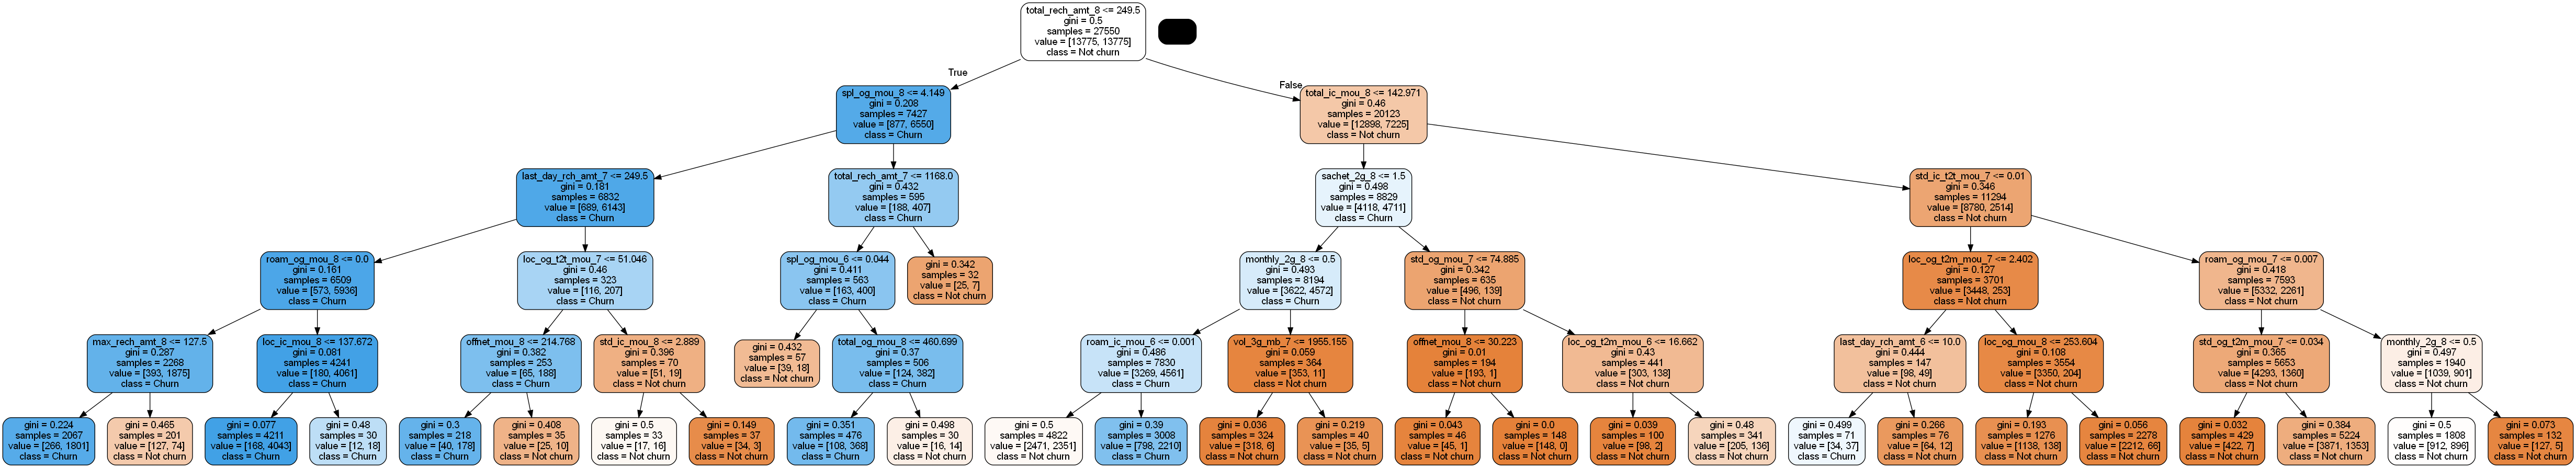

In [308]:
# plotting tree with max_depth=5
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train_sm_ran.columns, 
                class_names=['Not churn', "Churn"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


# Iterpretations:
- Three models were build using logistic Regression, Random forest and Desicion Tree 
- Best model is Random forest
- best Accuracy score of Random Forest model for test data is .9256
- best recall score .7079
- Top 10 features by Random Forest
- roam_og_mou_8	0.119474
- roam_ic_mou_8	0.117997
- loc_ic_t2m_mou_8	0.049895
- total_rech_amt_8	0.048568
- last_day_rch_amt_8	0.040649
- loc_ic_mou_8	0.029144
- total_ic_mou_8	0.027982
- arpu_8	0.023666
- max_rech_amt_8	0.021792
- loc_ic_t2t_mou_8	0.020426

## prediction File by random forest Model is:    submission_ran_final.csv